# ELE510 Image Processing with robot vision: LAB, Exercise 5, Frequency-domain processing.

**Purpose:** *To learn about the Fourier Transform and its use for computation of the image Frequency Spectrum. The emphasis is on the fundamentals of digital images.*

The theory for this exercise can be found in chapter 6 of the text book [1] and in appendix A.1.3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
first. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>


## Problem 1

The Fourier Transform is separable, that means that the two-dimensional transform is a sequence of two one-dimensional transforms. 
For images this can be considered as a transform along rows followed by a transform along columns (note that the input to the second step is the result from the first step, i.e. an image where the rows represents frequency and the columns space, $F(f_{x},y)$). 
To get a better understanding of the **DFT** it is therefore convenient to study the one-dimensional transform:

\begin{equation}
    G(k) = \sum_{x=0}^{w-1} g(n)e^{-j2\pi\frac{kx}{w}}, \qquad k = 0, 1, 2, \;\cdots\;,(w-1),
\end{equation}

and its inverse, **IDFT**:

\begin{equation}\label{Lab2eq4}
    g(x) = \frac{1}{w}\sum_{k=0}^{w-1} G(k)e^{j2\pi\frac{kx}{w}}, \qquad  x = 0, 1, 2,\;\cdots\;,(w-1).
\end{equation}

One period of the signal is $g(x),\, x = 0, 1, 2,\;\cdots\;,(w-1)$ and in the frequency domain $F(k),\, k = 0, 1, 2, \;\cdots\;,(w-1)$.

**a)** Find the DC-component, $G(0)$. What does $\frac{G(0)}{w}$ represent?

In [1]:
# Answers go here

**b)** Show that the DFT is periodic, i.e. $G(k) = G(k+l\cdot w)$, where $l$ is an arbitrary integer.

In [2]:
# Answers go here

**c)** Find $G(k)$ for the centered box-function with 5 non-zero samples, $w = 16$.
\begin{equation} \label{Lab2eq5}
    g(x)  =
    \begin{cases}
          1  \qquad \text{for} \qquad   x = 0, 1, 2\;\text{and}\;14,15. \\
          0   \qquad \text{otherwise,}
    \end{cases}
\end{equation}


In [3]:
# Answers go here

Sketch both (using Python) $g(x)$ and $G(k)$ in the index range $-8,-7,\;\cdots\;,-1, 0, 1, 2,\;\cdots\;,7$ (note the periodic property of both functions).

In [4]:
# Sketch it using python.

# Both functions are discrete and periodic with period N=16. Note that the DFT of the discrete box
# function approximates a truncated "sinc" function. The continuous Fourier transform of the
# continuous box function is a "sinc" function with infinite duration.

import matplotlib.pyplot as plt  
import math

...

Ellipsis


## Problem 2


#### Introduction

An image can be considered as a 2-dimensional (2D) signal. 
Sampling is in the domain of spatial coordinates $(x_w,y_w)$. 
The continuous intensity function, $g(x_w,y_w)$, is sampled such that the image representation is a matrix, $g(x,y)$, where the indexes, $x$ and $y$ is connected to the coordinates by $x_w = x \,\Delta x_w$ and $y_w = y\,\Delta y_w$. 
The distance between each pixel is $\Delta x_w$ horizontally and $\Delta y_w$ vertically. 
We use $g(x,y)$, with indexes $y \in \{1,2, \cdots Y\}$ and $x \in \{1,2, \cdots X\}$. The image is rectangular, represented by a matrix of size  $Y \times X$.

We can represent the image in the frequency domain by taking the discrete Fourier transform. 
In this problem we will use the power spectrum defined by

\begin{equation}\label{Lab2eq1}
    P(i,j) = |G(i,j)|^{2}
\end{equation}

where $G(i,j)$ is the 2D DFT of the signal (image) $g(i,j)$. 
Most images has a large mean value ("DC-component") that gives a dominating peak in the frequency origin $(0,0)$. 
A typical image is also dominated by low frequency components and the power of high frequencies is low. 
The DFT assumes periodic signals, i.e. when an image is repeated periodically in all directions we usually get an edge at the border of the image.
This will give a response in the spectrum as a horizontal and vertical line through the origin. 
To avoid this it is common to use a bell shaped window function that reduces the signal to zero at the borders. 
This method for spectral estimation is called *windowed periodogram*. The function **impowsp2** that you will find here implements this method.

We want to visualize the power spectrum by an image, i.e. we transform the image from the spatial domain to the frequency domain. 
To enhance the high frequency components we use the following point operation

\begin{equation}\label{Lab2eq2}
    B(i,j) = \log(1+P(i,j))
\end{equation}

Before the point operation the DC-component must be removed **[*]** and the power spectrum should be centered (using **np.fftshift**), such that the frequency $(0,0)$ is in the center of the power spectrum image. 
We use **plt.imshow** to display the power spectrum image and choose normalized frequencies **[+]** for the axis.



**[*]** *This can be done by setting the center pixel in the power spectrum to zero. It can also be accomplished by subtracting the mean from the input image such that we find the DFT from a zero mean signal.*

**[+]** *The Fourier Transform of a digital signal is computed by the DFT (Discrete Fourier Transform) which is periodic in the frequency domain. One period corresponds to $2\pi$ ($[-\pi,\pi]$) for the angular frequency. We normalize this such that the frequency is in the interval $[-0.5,0.5]$.*

In [5]:
import numpy as np
import cv2
from scipy import signal

In [43]:
def impowsp2(Im, a, b, wtype, c, Fig):
    """
    The function finds the power spectrum of the image, Im.
    The power is estimated by using windowed periodogram, where the window type is:
    wtype = 1    : Kaiser,  b = [1,10]   beta
    wtype = 2    : Chebyshev,  b = [20,100] sidelobe att. in dB
    wtype = n > 2    : Rectangular,  b  don't care, i.e. no window
    
    a : amplification constant for visualization of high frequency content (e.g. a = 10).
    The DC-component is removed in all cases. For visualization the low frequency components in a region centered at
    zero can be removed. The size of the region is (2c-1)x(2c-1).
    
    Fig = [Figtype, Figure number]
        Figtype = 0 : no Figure
        Figtype = 1 : Only Frequency Spectrum
        Figtype = 2 : Both input Image and Frequency Spectrum
    
    Output is the normalized estimated spectrum, with no DC-component.
    
    """
    
    M,N = Im.shape
    L = max(M,N)
    if L<256: K = 256
    elif L <= 512: K = 512
    else: K = L
        
    A = Im - np.mean(Im[:])*np.ones_like(Im);
    # A is a zero mean signal, that means that the power for zero frequency, the DC component, is zero.
    
    if wtype == 1: # Kaiser window
        w1 = np.kaiser(M,b)
        w2 = np.kaiser(N,b)
    elif wtype == 2:# Chebyshev window
        w1 = signal.chebwin(M,b)
        w2 = signal.chebwin(N,b)
    else:
        w1 = np.ones(shape=(M,1))
        w2 = np.ones(shape=(M,1))
        
    W = w1 * np.transpose(w2)
    B = A * W
    F = np.fft.fft2(B, s=[K,K])
    F = np.fft.fftshift(F)
    P = F * np.conj(F)
    Pmax = np.max(P)
    P = P/Pmax
    Pout = P
        
    # Visualization
    if Fig == 0: print("No figure") # No figure 
    elif Fig == 1: # Only Frequency Spectrum
        m0 = (K/2)+1-c
        k = 2*c-1
        #P[m0+(1:k),m0+(1:k)] = np.zeros(k)
        B = np.log(np.ones_like(P) + a * Pmax * P)
        
        plt.figure(figsize=(100,10))
        plt.imshow(B, extent=[-0.5, 0.5, -0.5, 0.5])
        plt.title('Power spectrum')
        plt.axis([-0.5,0.5,-0.5,0.5])
        plt.show()
    elif Fig == 2: # Both input Image and Frequency Spectrum 
        m0 = (K/2)+1-c
        k = 2*c-1
        #P[m0+(1:k),m0+(1:k)] = np.zeros(k)
        C = np.log(np.ones_like(P) + a * Pmax * P)
                
        plt.figure(figsize=(10,10))
        plt.subplot(121)
        plt.imshow(Im, cmap='gray', vmin=0, vmax=255)
        plt.title("Image")
        plt.subplot(122)
        plt.imshow(np.real(C), extent=[-0.5, 0.5, -0.5, 0.5])
        plt.title('Power spectrum')
        plt.axis([-0.5,0.5,-0.5,0.5])
        plt.show()
    else: print("'No such Figure, Fig == 0, 1 or 2'")
        
    

### Problem 

A function (**impowsp2**) that computes and displays the power spectrum of an image is given here. Additional information of the function can be found at the end of the exercise.

In the following experiments use the parameters: $a=10$, $b=3$, $wtype=1$ and $c=0$ for the function **impowsp2**. 
We want to study the frequency spectrum for a set of different images.

The first image is a test image, **qcirchirp.bmp**, containing most frequencies. 
It is a circular pattern where the radial intensity function is a so called chirp signal with frequencies increasing from zero to the maximum allowed frequency for the given number of samples, avoiding aliasing. 
The given test pattern is one quadrant from a circular test image.

**a)** Use **impowsp2**, as described above, and find the power spectrum for the image **qcirchirp.bmp**.

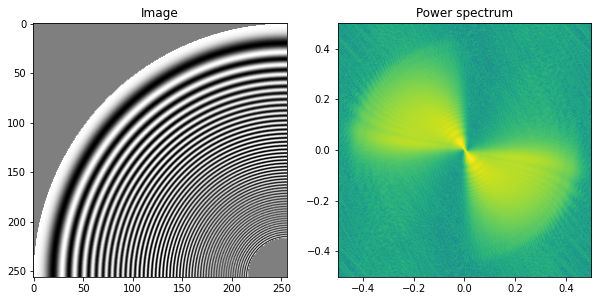

In [34]:
img=cv2.imread('./images/qcirchirp.bmp', 0)
impowsp2(img, 10, 3, 1, 0, 2)

**b)** Explain and describe the result. Is it as expected? Why is the power zero in the first and third quadrant?

In [8]:
# Because of low spatial frequency, power is zero in the first and third quadrant

**c)** Why is the power highest for lower spatial frequencies?

In [ ]:
# reference
# http://www.psy.vanderbilt.edu/courses/hon185/SpatialFrequency/SpatialFrequency.html
# https://www.cns.nyu.edu/~david/courses/perception/lecturenotes/channels/channels.html

# Spatial frequency describes the periodic distributions of light and dark in an image. High spatial frequencies correspond to 
# features such as sharp edges and fine details, whereas low spatial frequencies correspond to features such as global shape.
# The low frequency filters provide information about large objects, shadows, and other smooth, gradual changes in intensity 
# across the image. The higher spatial frequency filters emphasize progressively finer details. The power is high in lower
# spatial frequencies due to the imgae details of real world object.

The second image is a very popular test image, used for decades, the Camera Man, **cameraman.jpg**. 
This image is an example where the edges are very sharp and the power spectrum indicates **aliasing**.

**d)** Find the power spectrum for the image **cameraman.jpg**.

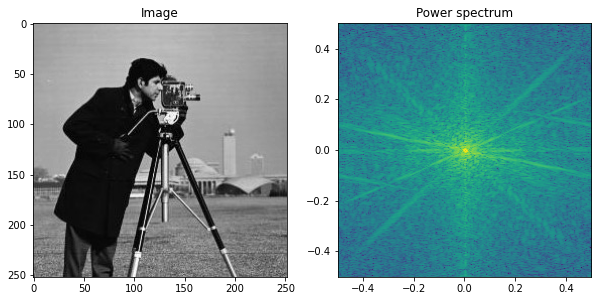

In [35]:
img=cv2.imread('./images/cameraman.jpg', 0)
impowsp2(img, 10, 3, 1, 0, 2)

**e)** Explain which parts of the image gives rise to the lines in the spectrum.

In [11]:
# Bright whiter region at the center showing low frequency content is more availabe. The value of the power spectrum at the 
# origin is high, which showing the values of the important frequencies. Thus, this result means that the original image 
# contained lower frequency components more than higher frequency components. 

**f)** How can you explain, from the power spectrum, why we have aliasing. 

**Hint**: Study the lines in the spectrum that reaches the border and find where these lines continues, when we know that the spectrum repeats itself periodically.

Finally we want to study the power spectrum for some images, representing different image textures.

In [12]:
# When a system is measured at an insufficient sampling rate, aliasing occurs. When a picture is acquired with a sensor that 
# can't capture higher frequencies we can this phenomenon.

**g)** Find the power spectrum for: skin1, soap-bubbles, tex\_ori, tex\_scl and textil1.

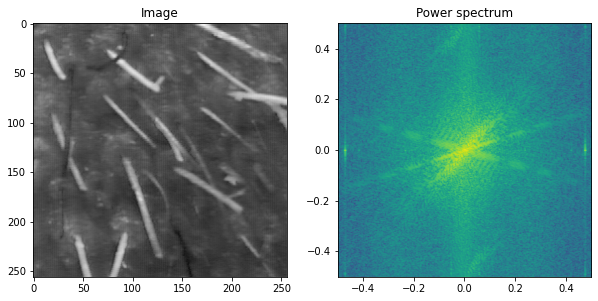

In [36]:
img=cv2.imread('./images/skin1.png', 0)
impowsp2(img, 10, 3, 1, 0, 2)

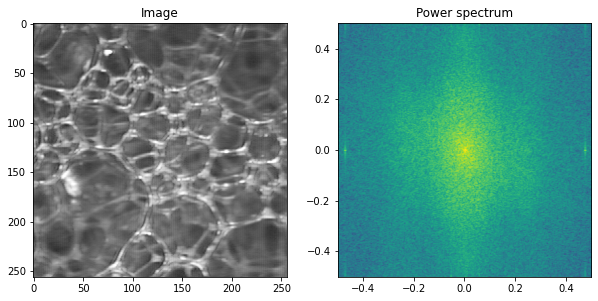

In [39]:
img=cv2.imread('./images/soapbubbles.png', 0)
impowsp2(img, 10, 3, 1, 0, 2)

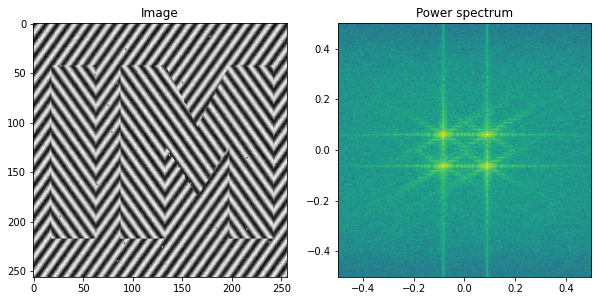

In [40]:
img=cv2.imread('./images/tex_ori.png', 0)
impowsp2(img, 10, 3, 1, 0, 2)

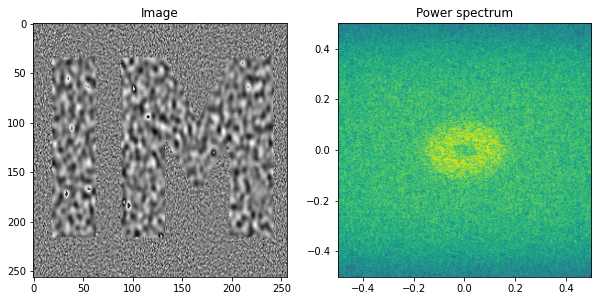

In [41]:
img=cv2.imread('./images/tex_scl.png', 0)
impowsp2(img, 10, 3, 1, 0, 2)

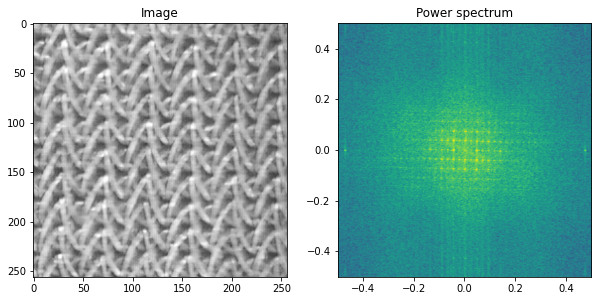

In [42]:
img=cv2.imread('./images/textil1.png', 0)
impowsp2(img, 10, 3, 1, 0, 2)

**h)** Explain and describe the results.


In [14]:
# reference
# https://www.cs.unm.edu/~brayer/vision/fourier.html

# skin1, soap-bubbles have the center bright spot, which accounts for most of the power in the image
# tex_ori, tex_scl and textil1 bright spot is beyond the the middle point and distributed at the close to the center point.


## Problem 3

We test the filters from exercise 4 (shown below), we use the test image **qcirchirp.bmp**. 
Filtering is done by using the function `cv2.filter2D()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#cv2.filter2D)). 

The input is the image matrix, the filter mask (in $X$ and $Y$ directions) and a flag parameter specifying how the boundary should be treated. Here's an example of how to call the function:
```python
Imoutput = cv2.filter2D(Iminput,ddepth=-1,kernel=(filtermask*filtermask.T),borderType=borderType)
``` 
To study the result in the frequency domain we use the function **impowsp2** defined before.

Filter masks:

```python
h1 = cv2.getGaussianKernel(9,1)
h15 = cv2.getGaussianKernel(11,1.5)
h2 = cv2.getGaussianKernel(15,2)
```

**a)** Use the filter masks `h1`, `h15` and `h2` with `cv2.BORDER_DEFAULT` boundary. Filter **qcirchirp.bmp** using `cv2.filter2D(...)` and find the power spectrums.

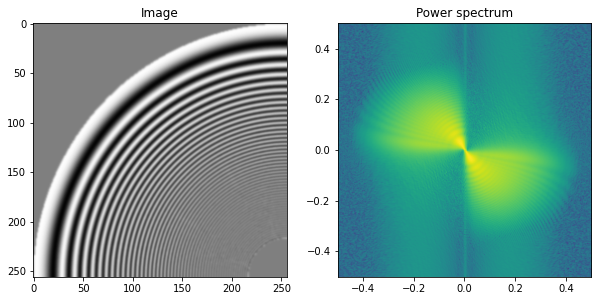

In [108]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Iminput=cv2.imread('./images/qcirchirp.bmp', 0)

h1 = cv2.getGaussianKernel(9,1)
h15 = cv2.getGaussianKernel(11,1.5)
h2 = cv2.getGaussianKernel(15,2)

ImoutputH1 = cv2.filter2D(Iminput,ddepth=-1,kernel=(h1*h1.T),borderType=cv2.BORDER_DEFAULT)
ImoutputH15 = cv2.filter2D(Iminput,ddepth=-1,kernel=(h15*h15.T),borderType=cv2.BORDER_DEFAULT)
ImoutputH2 = cv2.filter2D(Iminput,ddepth=-1,kernel=(h2*h2.T),borderType=cv2.BORDER_DEFAULT)

# power spectrum of h1
impowsp2(ImoutputH1, 10, 3, 1, 0, 2)

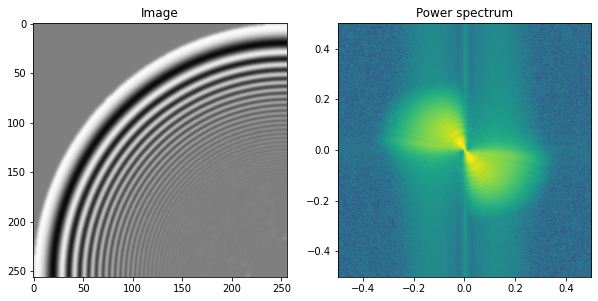

In [109]:
# power spectrum of h15
impowsp2(ImoutputH15, 10, 3, 1, 0, 2)

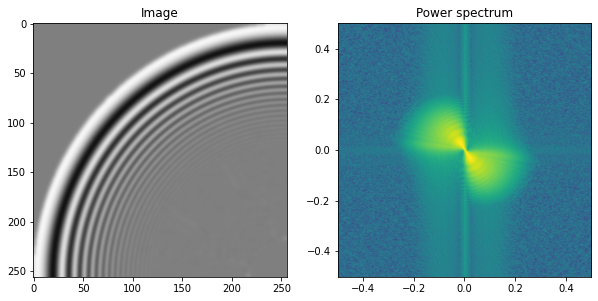

In [110]:
# power spectrum of h2
impowsp2(ImoutputH2, 10, 3, 1, 0, 2)

**b)** Which of the three filters do you think is most appropriate if the image is going to be downsampled by a factor 2?


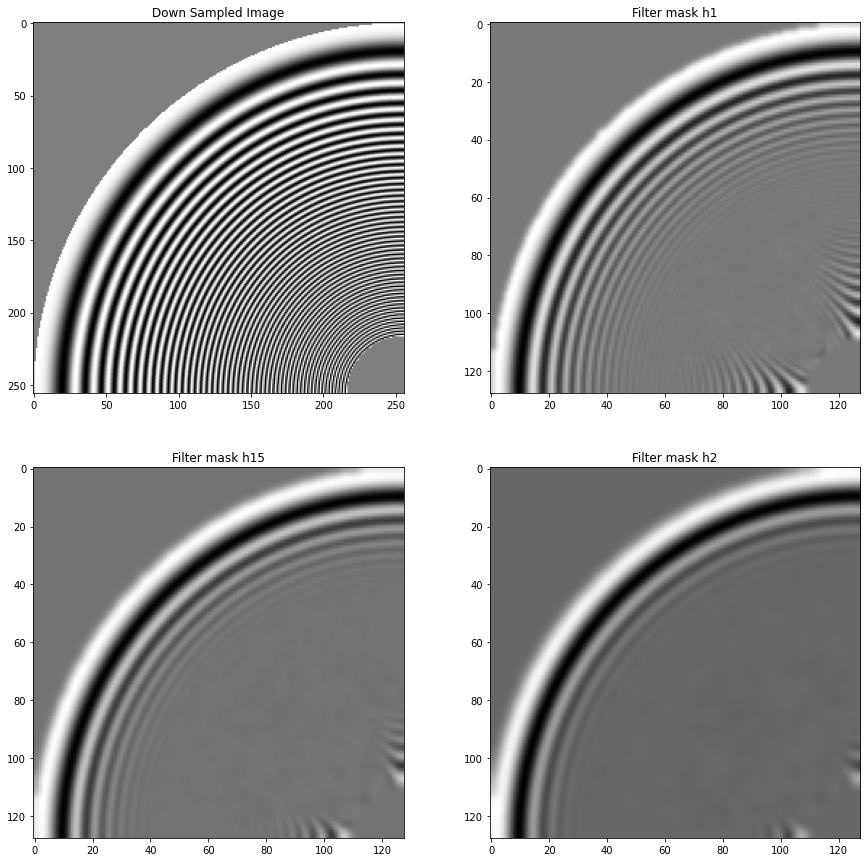

In [114]:
# reference
# https://www.geeksforgeeks.org/spatial-resolution-down-sampling-and-up-sampling-in-image-processing/

import numpy as np
import cv2
import matplotlib.pyplot as plt

Iminput=cv2.imread('./images/qcirchirp.bmp', 0)
[m, n] = Iminput.shape
factor =2

downSampledImage = np.zeros((m//f, n//factor), dtype=np.int32)

for i in range(0, m, f):
    for j in range(0, n, f):
        try:
            downSampledImage[i//f][j//f] = Iminput[i][j]
        except IndexError:
            pass

h1 = cv2.getGaussianKernel(9,1)
h15 = cv2.getGaussianKernel(11,1.5)
h2 = cv2.getGaussianKernel(15,2)

ImoutputH1 = cv2.filter2D(downSampledImage,ddepth=-1,kernel=(h1*h1.T),borderType=cv2.BORDER_DEFAULT)
ImoutputH15 = cv2.filter2D(downSampledImage,ddepth=-1,kernel=(h15*h15.T),borderType=cv2.BORDER_DEFAULT)
ImoutputH2 = cv2.filter2D(downSampledImage,ddepth=-1,kernel=(h2*h2.T),borderType=cv2.BORDER_DEFAULT)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(Iminput, cmap='gray')
plt.title('Down Sampled Image')

plt.subplot(2 ,2, 2)
plt.imshow(ImoutputH1, cmap='gray')
plt.title('Filter mask h1')

plt.subplot(2, 2, 3)
plt.imshow(ImoutputH15, cmap='gray')
plt.title('Filter mask h15')

plt.subplot(2, 2, 4)
plt.imshow(ImoutputH2, cmap='gray')
plt.title('Filter mask h2')
plt.show()



# filters h1 is most appropriate if the image is going to be downsampled by a factor 2


## Problem 4

Create a python script to find the 2D discrete Fourier transform (DFT) of an image (use `cameraman.jpg`). 

**a)** From the DFT, calculate and plot: **the magnitude and the phase**.

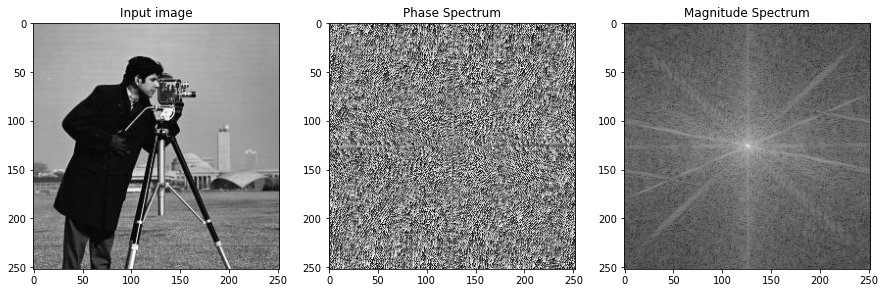

In [152]:
# reference
# https://sparkle-mdm.medium.com/python-computer-vision-tutorials-image-fourier-transform-part-1-4e91e4e74724
# https://wasedamagina.github.io/2018/01/30/dft/
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php

import numpy as np
import cv2
from matplotlib import pyplot as plt

discreteFourierTransform2D = np.fft.fft2(img) # Calculating 2D DFT for phase spectrum
discreteFourierTransform2DShift = np.fft.fftshift(discreteFourierTransform2D) # Shift the zero-frequency component to the center of the spectrum
phaseSpectrum = np.angle(discreteFourierTransform2DShift) # Calculating phase spectrum
# magnitudeSpectrum = np.log(np.abs(discreteFourierTransform2D))

discreteFourierTransform = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT) # Calculating DFT for magnitude spectrum
discreteFourierTransformShift = np.fft.fftshift(discreteFourierTransform) # Shift the zero-frequency component to the center of the spectrum
magnitudeSpectrum = 20 * np.log(cv2.magnitude(discreteFourierTransformShift[:,:,0], discreteFourierTransformShift[:,:,1])) # Calculating magnitude spectrum

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Input image')

plt.subplot(1,3,2)
plt.imshow(phaseSpectrum, cmap='gray')
plt.title('Phase Spectrum')

plt.subplot(1,3,3)
plt.imshow(magnitudeSpectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

**b)** Shift the zero-frequency component to the center of the spectrum and plot the result.

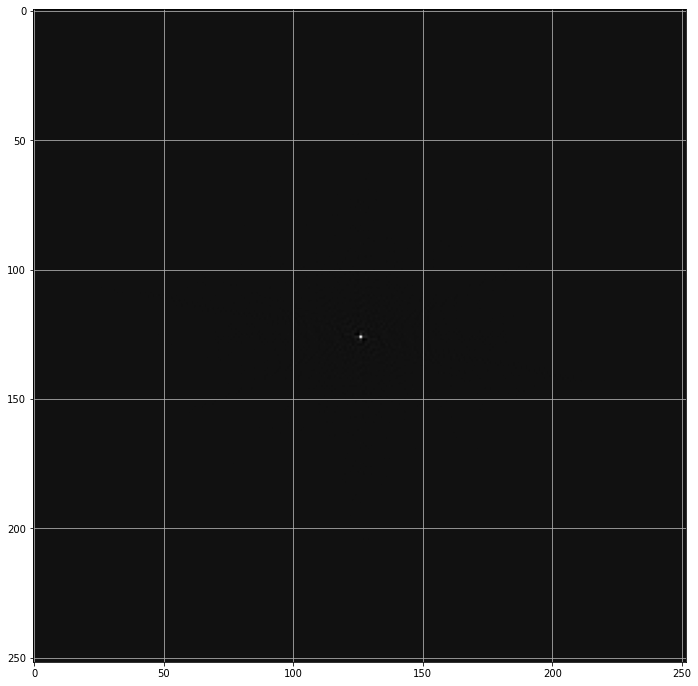

In [153]:
plt.figure(figsize=(13,12))
plt.grid()
plt.imshow(np.real(discreteFourierTransform2DShift), cmap='gray')
plt.show()

**c)** Where is the DC component for the points **a)** and **b)**?
 

In [154]:
# For a) it lies near the top and bottom corner of the image
# For b) it lies in the middle of the image

### Delivery (dead line) on CANVAS: 10.10.2021 at 23:59

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,

E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401

E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.